# Problem Statement
The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. We have to find out how consumer attributes and loan attributes influence the tendency of default.

In [1]:
#Importing the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

## 1. Data Understanding 
- Read the data
- Check the shape of data 
- check sample data - head, tail and sample


In [2]:
loan = pd.read_csv("loan.csv")

In [3]:
loan.shape

(39717, 111)

In [4]:
loan.sample(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
2318,1036474,1266349,7500,7500,7500.0,36 months,15.27%,260.99,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4990,892936,1109970,31500,31500,31500.0,60 months,15.96%,765.35,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
22412,629484,806527,1000,1000,1000.0,60 months,13.35%,22.94,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
18261,701177,892931,9000,9000,9000.0,60 months,11.11%,196.18,B,B5,...,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN
39528,169044,153468,18500,18500,156.7,36 months,10.91%,604.88,C,C3,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [5]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
loan.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
loan.describe

<bound method NDFrame.describe of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ... 

### Identify the target column 
"Loan status" column will be the target variable

In [8]:
# Let's check the value in this column
loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

- Since loan with status "current" is loan where customer is paying regularly and is not usefull for analysis, the corresponding entries will be dropped.
- Loan status value "Full Paid" will be replaced with 0 and "charged off" will be replace with 1.This will be helpful in the analysis and creating plots.

In [9]:
# Drop the record where loan status is current
loan = loan[loan.loan_status != "Current"]

In [10]:
loan.shape

(38577, 111)

In [11]:
# Replace the value in loan_status column
loan.loan_status = loan.loan_status.apply(lambda x: 1 if x == 'Charged Off' else 0)

In [12]:
loan.loan_status.value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

## 2. Data Cleaning 
- Check the percentage of missing value for each column
- Drop the record with high percentage of missing value in column (> 80% missing value)
- Drop the record where there is high number of missing value in a row ( > 5 )
- Drop the columns related to customer behaviour variables
- Impute the missing values 
- Correct the data types

In [13]:
# null percentage in column
null_per = round(100*(loan.isnull().sum()/len(loan.index)),2)
print(null_per)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64


In [14]:
# list of column having missing value percentage > 80
list_c = list(loan.columns[null_per > 80])
list_c

['mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percen

In [15]:
# We will drop all the column where missing values is > 80%
loan = loan.drop(list_c, axis=1) 

In [16]:
# shape of dataset after dropping the values
loan.shape

(38577, 55)

### Comment about dropping columns
- Customer behaviour variables 
    - The variables generated after loan is approved is of no use for this analysis.
    - All the column which contains customer behaviour variables will be dropped
- Most of the records having same value in column loan_amnt, funded_amnt and funded_amnt_inv. The funded_amnt_inv which defines the amount funded to the borrower will be retained and the other two columns will be dropped.

In [17]:
# list of all columns
list(loan.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens']

In [18]:
# Dropping the columns not required as per above comment
loan = loan.drop(['url',
                'member_id',
                'delinq_2yrs',
                'mths_since_last_delinq',
                'revol_bal',
                'revol_util',
                'out_prncp',
                'out_prncp_inv',
                'total_pymnt',
                'total_pymnt_inv',
                'total_rec_prncp',
                'collections_12_mths_ex_med',
                'acc_now_delinq',
                'chargeoff_within_12_mths',
                'delinq_amnt',
                'tax_liens',
                'collection_recovery_fee',
                'last_pymnt_d',
                'last_pymnt_amnt',
                'recoveries',
                'total_rec_int',
                'total_rec_late_fee',
                'desc',
                'loan_amnt',
                'funded_amnt'], axis=1)

In [19]:
# shape of dataset after dropping the columns
loan.shape

(38577, 30)

In [20]:
# number of rows having null value greater than 5
len(loan[loan.isnull().sum(axis=1)>5].index)

0

In [21]:
#Checking the null % of the columns again
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                      0.00
funded_amnt_inv         0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_title               6.19
emp_length              2.68
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
pymnt_plan              0.00
purpose                 0.00
title                   0.03
zip_code                0.00
addr_state              0.00
dti                     0.00
earliest_cr_line        0.00
inq_last_6mths          0.00
open_acc                0.00
pub_rec                 0.00
total_acc               0.00
initial_list_status     0.00
last_credit_pull_d      0.01
policy_code             0.00
application_type        0.00
pub_rec_bankruptcies    1.81
dtype: float64

In [22]:
# Values in employee title column
loan.emp_title.value_counts()

US Army                             131
Bank of America                     107
IBM                                  65
AT&T                                 57
Kaiser Permanente                    56
                                   ... 
Liz Claiborne Inc                     1
Vishay Intertechnology                1
North American Health Care, Inc.      1
Activfinancial Systems                1
The Star Group                        1
Name: emp_title, Length: 28027, dtype: int64

In [23]:
# Imputing the "na" value in emp_title with the "unknown"
loan.emp_title = loan.emp_title.fillna("Unknown")

In [24]:
# check the null percentage again
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                      0.00
funded_amnt_inv         0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_title               0.00
emp_length              2.68
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
pymnt_plan              0.00
purpose                 0.00
title                   0.03
zip_code                0.00
addr_state              0.00
dti                     0.00
earliest_cr_line        0.00
inq_last_6mths          0.00
open_acc                0.00
pub_rec                 0.00
total_acc               0.00
initial_list_status     0.00
last_credit_pull_d      0.01
policy_code             0.00
application_type        0.00
pub_rec_bankruptcies    1.81
dtype: float64

In [25]:
# we will check pub_rec_bankruptcies and correct missing values
loan.head()

,id,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,total_acc,initial_list_status,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies
0,1077501,4975.0,36 months,10.65%,162.87,B,B2,Unknown,10+ years,RENT,...,Jan-85,1,3,0,9,f,May-16,1,INDIVIDUAL,0.0
1,1077430,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,...,Apr-99,5,3,0,4,f,Sep-13,1,INDIVIDUAL,0.0
2,1077175,2400.0,36 months,15.96%,84.33,C,C5,Unknown,10+ years,RENT,...,Nov-01,2,2,0,10,f,May-16,1,INDIVIDUAL,0.0
3,1076863,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,...,Feb-96,1,10,0,37,f,Apr-16,1,INDIVIDUAL,0.0
5,1075269,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,...,Nov-04,3,9,0,12,f,Jan-16,1,INDIVIDUAL,0.0


In [26]:
# check the null value records
loan[loan.pub_rec_bankruptcies.isnull()]

,id,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,total_acc,initial_list_status,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies
35006,69001,14875.000000,36 months,8.94%,476.58,A,A5,Unknown,< 1 year,MORTGAGE,...,Nov-91,1,6,0,19,f,Aug-15,1,INDIVIDUAL,NaN
35058,59006,2988.236621,36 months,14.26%,102.92,C,C5,Unknown,3 years,MORTGAGE,...,Jul-98,0,13,0,23,f,Sep-12,1,INDIVIDUAL,NaN
35362,65426,3892.258856,36 months,11.14%,131.22,B,B1,"Infotrieve, Inc.",< 1 year,MORTGAGE,...,Aug-95,0,14,0,33,f,May-16,1,INDIVIDUAL,NaN
38443,68926,589.605658,36 months,13.17%,77.69,D,D2,UBS,10+ years,RENT,...,Dec-97,0,4,0,13,f,May-16,1,INDIVIDUAL,NaN
38717,69251,500.000000,36 months,8.00%,188.02,A,A3,Unknown,< 1 year,MORTGAGE,...,Dec-94,1,16,0,39,f,May-11,1,INDIVIDUAL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,1075.000000,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,...,Nov-90,0,13,0,40,f,Jun-10,1,INDIVIDUAL,NaN
39713,90665,875.000000,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,...,Dec-86,1,6,0,9,f,Jul-10,1,INDIVIDUAL,NaN
39714,90395,1325.000000,36 months,8.07%,156.84,A,A4,Unknown,< 1 year,MORTGAGE,...,Oct-98,0,11,0,20,f,Jun-07,1,INDIVIDUAL,NaN
39715,90376,650.000000,36 months,7.43%,155.38,A,A2,Unknown,< 1 year,MORTGAGE,...,Nov-88,0,17,0,26,f,Jun-07,1,INDIVIDUAL,NaN


In [27]:
# drop records where pub_rec_bankruptcies and title is null
loan = loan[~(loan.pub_rec_bankruptcies.isnull())]
loan = loan[~(loan.title.isnull())]

In [28]:
# check the null percentage again
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                      0.00
funded_amnt_inv         0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_title               0.00
emp_length              2.73
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
pymnt_plan              0.00
purpose                 0.00
title                   0.00
zip_code                0.00
addr_state              0.00
dti                     0.00
earliest_cr_line        0.00
inq_last_6mths          0.00
open_acc                0.00
pub_rec                 0.00
total_acc               0.00
initial_list_status     0.00
last_credit_pull_d      0.00
policy_code             0.00
application_type        0.00
pub_rec_bankruptcies    0.00
dtype: float64

In [29]:
# there is 2.73% record with null value in emp_length. Let's check these records
loan[loan.emp_length.isnull()]

,id,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,total_acc,initial_list_status,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies
168,1067644,2500.00000,36 months,7.51%,77.78,A,A3,Unknown,NaN,OWN,...,Aug-94,2,13,0,20,f,May-16,1,INDIVIDUAL,0.0
323,1058717,18000.00000,60 months,17.58%,452.98,D,D4,Unknown,NaN,MORTGAGE,...,Mar-03,1,11,0,28,f,Sep-15,1,INDIVIDUAL,0.0
394,1064582,4000.00000,36 months,11.71%,132.31,B,B3,Unknown,NaN,RENT,...,Feb-05,0,4,0,6,f,May-12,1,INDIVIDUAL,0.0
422,1064366,1000.00000,36 months,14.65%,34.50,C,C3,Unknown,NaN,RENT,...,Apr-93,2,3,1,8,f,Jun-12,1,INDIVIDUAL,1.0
439,1063912,8250.00000,36 months,7.51%,256.67,A,A3,Unknown,NaN,MORTGAGE,...,Dec-81,4,17,0,37,f,Dec-14,1,INDIVIDUAL,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32591,480410,9975.00000,36 months,14.22%,342.85,C,C5,Unknown,NaN,RENT,...,Sep-00,0,9,0,17,f,Jul-10,1,INDIVIDUAL,0.0
32608,480216,3700.00000,36 months,14.22%,126.86,C,C5,Unknown,NaN,RENT,...,Aug-06,0,2,0,5,f,Apr-16,1,INDIVIDUAL,0.0
32621,479954,9731.17513,36 months,14.22%,342.85,C,C5,Unknown,NaN,MORTGAGE,...,Apr-00,3,3,0,19,f,Apr-16,1,INDIVIDUAL,0.0
32631,479836,6000.00000,36 months,12.73%,201.40,C,C1,Tong Parks,NaN,MORTGAGE,...,Oct-01,0,7,1,12,f,Feb-13,1,INDIVIDUAL,0.0


In [30]:
# check the values in emp_length column
loan.emp_length.value_counts()

10+ years    8368
< 1 year     4340
2 years      4207
3 years      3951
4 years      3295
5 years      3159
1 year       3076
6 years      2135
7 years      1688
8 years      1410
9 years      1208
Name: emp_length, dtype: int64

In [31]:
# missing value can be impute with "10+ years"
val = loan.emp_length.mode()[0]
val

'10+ years'

In [32]:
# impute the missing value in emp_length with abobe value 
loan.emp_length = loan.emp_length.fillna(val)

In [33]:
# checking null value one more time
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                      0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_title               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
pymnt_plan              0.0
purpose                 0.0
title                   0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
earliest_cr_line        0.0
inq_last_6mths          0.0
open_acc                0.0
pub_rec                 0.0
total_acc               0.0
initial_list_status     0.0
last_credit_pull_d      0.0
policy_code             0.0
application_type        0.0
pub_rec_bankruptcies    0.0
dtype: float64

### Check and correct the data type of imp columns
- Now the data doesn't have any missing values
- Check the data types of imp columns and replace the value. Change the data type to numeric or float for column like int rate 

In [34]:
# Check info for all columns
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37869 entries, 0 to 39680
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    37869 non-null  int64  
 1   funded_amnt_inv       37869 non-null  float64
 2   term                  37869 non-null  object 
 3   int_rate              37869 non-null  object 
 4   installment           37869 non-null  float64
 5   grade                 37869 non-null  object 
 6   sub_grade             37869 non-null  object 
 7   emp_title             37869 non-null  object 
 8   emp_length            37869 non-null  object 
 9   home_ownership        37869 non-null  object 
 10  annual_inc            37869 non-null  float64
 11  verification_status   37869 non-null  object 
 12  issue_d               37869 non-null  object 
 13  loan_status           37869 non-null  int64  
 14  pymnt_plan            37869 non-null  object 
 15  purpose            

### We will correct the data type of imp column like int_rate, term, emp_length                   

In [35]:
# interest rate should be float and not object
loan.int_rate.value_counts()

10.99%    913
11.49%    788
7.51%     787
13.49%    749
7.88%     725
         ... 
13.93%      1
10.46%      1
12.49%      1
17.46%      1
10.91%      1
Name: int_rate, Length: 336, dtype: int64

In [36]:
# we have to remove "%" value from this column
loan.int_rate = loan.int_rate.apply(lambda x:x.replace("%",""))

In [37]:
# check the value counts
loan.int_rate.value_counts()

10.99    913
11.49    788
7.51     787
13.49    749
7.88     725
        ... 
10.46      1
9.83       1
18.72      1
17.44      1
10.91      1
Name: int_rate, Length: 336, dtype: int64

In [38]:
loan.int_rate.dtype

dtype('O')

In [39]:
# set the data type as 'float'
loan.int_rate = loan.int_rate.astype('float')

In [40]:
# verify the data type of interest rate again
loan.int_rate.dtype

dtype('float64')

In [41]:
# Employee length should be integer and not object
loan.emp_length.dtype

dtype('O')

In [42]:
# we will check the value in this column 
loan.emp_length.value_counts()

10+ years    9400
< 1 year     4340
2 years      4207
3 years      3951
4 years      3295
5 years      3159
1 year       3076
6 years      2135
7 years      1688
8 years      1410
9 years      1208
Name: emp_length, dtype: int64

In [43]:
# the values in this column need to replace 
# Replace +, <1 and years
loan.emp_length = loan.emp_length.apply(lambda x:x.replace("+",""))
loan.emp_length = loan.emp_length.apply(lambda x:x.replace("< 1","0"))
loan.emp_length = loan.emp_length.apply(lambda x:x.replace(" years",""))
loan.emp_length = loan.emp_length.apply(lambda x:x.replace(" year",""))

In [44]:
# check the value count again
loan.emp_length.value_counts()

10    9400
0     4340
2     4207
3     3951
4     3295
5     3159
1     3076
6     2135
7     1688
8     1410
9     1208
Name: emp_length, dtype: int64

In [45]:
# set the data type as integer
loan.emp_length = loan.emp_length.astype('int32')

In [46]:
# now we will check the value in term column 
loan.term.value_counts()

 36 months    28392
 60 months     9477
Name: term, dtype: int64

In [47]:
# remove "months" from loan term value
loan.term = loan.term.apply(lambda x:x.replace(" months",""))

In [48]:
# set the data type of term as integer
loan.term = loan.term.astype('int32')

In [49]:
# reset the index and check the info again
loan.reset_index(inplace=True, drop=True)
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37869 entries, 0 to 37868
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    37869 non-null  int64  
 1   funded_amnt_inv       37869 non-null  float64
 2   term                  37869 non-null  int32  
 3   int_rate              37869 non-null  float64
 4   installment           37869 non-null  float64
 5   grade                 37869 non-null  object 
 6   sub_grade             37869 non-null  object 
 7   emp_title             37869 non-null  object 
 8   emp_length            37869 non-null  int32  
 9   home_ownership        37869 non-null  object 
 10  annual_inc            37869 non-null  float64
 11  verification_status   37869 non-null  object 
 12  issue_d               37869 non-null  object 
 13  loan_status           37869 non-null  int64  
 14  pymnt_plan            37869 non-null  object 
 15  purpose            

In [50]:
# writing the clean dataframe to an another file
loan.to_csv("loan_df.csv", sep=',', index=False)

In [51]:
# read the updated data again
clean_loan = pd.read_csv("loan_df.csv", sep=',')

In [52]:
# check the shape
clean_loan.shape

(37869, 30)

In [53]:
# sample data
clean_loan.head()

,id,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,total_acc,initial_list_status,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies
0,1077501,4975.0,36,10.65,162.87,B,B2,Unknown,10,RENT,...,Jan-85,1,3,0,9,f,May-16,1,INDIVIDUAL,0.0
1,1077430,2500.0,60,15.27,59.83,C,C4,Ryder,0,RENT,...,Apr-99,5,3,0,4,f,Sep-13,1,INDIVIDUAL,0.0
2,1077175,2400.0,36,15.96,84.33,C,C5,Unknown,10,RENT,...,Nov-01,2,2,0,10,f,May-16,1,INDIVIDUAL,0.0
3,1076863,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,...,Feb-96,1,10,0,37,f,Apr-16,1,INDIVIDUAL,0.0
4,1075269,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,...,Nov-04,3,9,0,12,f,Jan-16,1,INDIVIDUAL,0.0


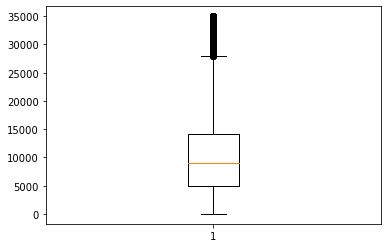

In [54]:
#Create a box plot for the funded_amnt_inv column to check outliers
plt.boxplot(clean_loan.funded_amnt_inv)
plt.show()

In [55]:
# there is not much difference in value for loan amount. i.e. there is no outliers
clean_loan.funded_amnt_inv.describe()

count    37869.000000
mean     10368.005164
std       6999.515924
min          0.000000
25%       5000.000000
50%       8975.000000
75%      14200.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

## 3. Univariate Analysis

In [56]:
# check pymnt_plan column
clean_loan.pymnt_plan.value_counts()

n    37869
Name: pymnt_plan, dtype: int64

In [57]:
#payment_plan has the same value in across the rows. So droping this column.
clean_loan = clean_loan.drop("pymnt_plan", axis=1)

In [58]:
# check application_type column
clean_loan.application_type.value_counts()

INDIVIDUAL    37869
Name: application_type, dtype: int64

In [59]:
#application_type has the same value in across the rows. So droping this column.
clean_loan = clean_loan.drop("application_type", axis=1)

In [60]:
# check policy_code column
clean_loan.policy_code.value_counts()

1    37869
Name: policy_code, dtype: int64

In [61]:
#policy_code has the same value in across the rows. So droping this column.
clean_loan = clean_loan.drop("policy_code", axis=1)

In [62]:
# check initial_list_status column
clean_loan.initial_list_status.value_counts()

f    37869
Name: initial_list_status, dtype: int64

In [63]:
#initial_list_status has the same value in across the rows. So droping this column.
clean_loan = clean_loan.drop("initial_list_status", axis=1)

In [64]:
'''Removing the columns as these are not feasible for the analysis and not showing any correlation with the loan_Status
emp_title: There are 27k unique values among 37k entries. We can neither group nor bin these.
title: There are 18k unique values among 37k entries. We can neither group nor bin these.
last_credit_pull_d: This isn't showing impact on the loan_status from the data as well as the domain perspective.
zip_code: There are 809 unique values, grouped these as per the first number in the zip_code but still it isn't showing impact 
          on the loan_status.
 '''
clean_loan = clean_loan.drop(['emp_title','title','last_credit_pull_d','zip_code'],axis =1)

In [65]:
#reset the index and check shape again
clean_loan.reset_index(inplace=True, drop=True)
clean_loan.shape

(37869, 22)

In [66]:
#function for binning continuous varaible into the verylow, low, Medium, High and Very High bins using the quantiles.
def create_bins(column_name):
    bin_labels_5 = ['VL','L', 'M', 'H','VH'] # Very Low, Low, Medium, High, Very High
    bin_column_name = column_name+"_bins"
    clean_loan[bin_column_name], bins = pd.qcut(clean_loan[column_name],
                              q = [0, 0.2, 0.4, 0.6, 0.8, 1],
                              labels=bin_labels_5,retbins = True)

In [67]:
'''The dervied metric has been created for the following columns using the binning. 
The bins are Very low, low, medium, high and very high and they has been created using the quantiles.

funded_amnt_inv: It's the funded amount for the loan.
int_rate: Interest rate charged on the loan.
annual_inc: Annual income of the borrower.
dti: debt to income ratio of the borrower.
total_acc: Number of credit accounts that the borrower has.
open_acc: Number of open accounts that the borrower has.
installment: installment amount for the loan.'''

ColumnNamesForBinning = ['funded_amnt_inv', 'int_rate',
                         'annual_inc', 'dti', 'total_acc','open_acc','installment']

In [68]:
#Binning the columns
for column in ColumnNamesForBinning:
    create_bins(column)

In [69]:
#Changing the issue_d to the datetime
clean_loan.issue_d = pd.to_datetime(clean_loan.issue_d, format='%b-%y')

In [70]:
#Deriving the year from the issue_d column
clean_loan['year'] = clean_loan.issue_d.dt.year

In [71]:
#Deriving the month from the issue_d column
clean_loan['month'] = clean_loan.issue_d.dt.month

In [72]:
#Deriving the year from the earliest credit line. Deriving the month isn't useful as per the data as well as the domain.
clean_loan['earliest_cr_line_year'] = clean_loan.earliest_cr_line.apply(lambda x: x[4:])

In [73]:
'''Function to print the impact of the variable on the Loan_status
This function takes the columnName as an input and calculates the default% (mean of the loan_status) for each value 
of the column and returns the impact of the column on the loan_status.
The impact is calculated as the difference of the maximum mean and minimum mean of the loan_status
'''
def impact_of_the_variable(ColumnName):
    pt = pd.pivot_table(clean_loan, values='loan_status', index=ColumnName, aggfunc=np.mean)
    #print(pt)
    return pt.max()-pt.min()

In [74]:
''' Not taking the below columns for the impact analysis
funded_amnt_inv, int_rate, installment, annual_inc, total_acc, open_acc, dti : Bins are created for this column.
                                                                               and using those columns for the impact analysis.
id: This is the unique column for the dataset. So not using this for the impact analysis.
issue_d: Derived the month and year from this column and using those columns for the impact analysis.
loan_status: This is the target variable. So not using this for the impact analysis
earliest_cr_line: Derived the year from this column and using this that column for the impact analysis.
'''
Columns_not_used_for_impact_analysis=  ['id','funded_amnt_inv','int_rate','installment','annual_inc','issue_d','loan_status',
                                        'dti','open_acc','total_acc','earliest_cr_line']

In [75]:
#Getting all the columns
All_columns = list(clean_loan.columns)
#Removing the columns which are not used for the impact analysis from all the columns
Columns_for_impact_analysis = [x for x in All_columns if x not in Columns_not_used_for_impact_analysis]

In [76]:
#Creating the impact table
impact_table = []
for column in Columns_for_impact_analysis:
    impact_table.append([column,impact_of_the_variable(column)[0]])
impact_table = pd.DataFrame(impact_table,columns = ['Variable','impact'])
impact_table.sort_values(by = 'impact',ascending = False)

,Variable,impact
2,sub_grade,0.450882
20,earliest_cr_line_year,0.400000
1,grade,0.279877
10,pub_rec_bankruptcies,0.258144
7,addr_state,0.226891
9,pub_rec,0.226179
12,int_rate_bins,0.210102
8,inq_last_6mths,0.172135
6,purpose,0.166046
18,year,0.159865


All the columns has been sorted in their impact order on the loan_status. Let's explore (in the same order) about each of this column in the univariate analysis.

In [77]:
# percentage of default in the entire cleaned dataset
round(np.mean(clean_loan.loan_status),2)*100

15.0

<AxesSubplot:xlabel='sub_grade', ylabel='loan_status'>

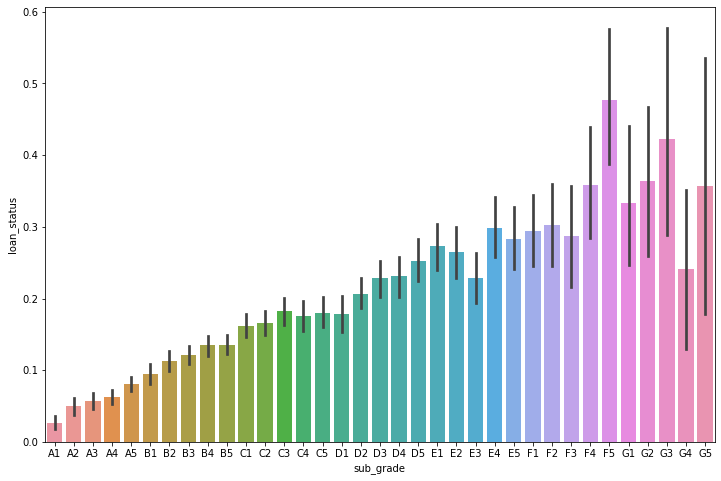

In [78]:
#Plotting the default probablitiy against the sub_grade
plt.figure(figsize=(12,8))
sns.barplot(x=clean_loan.sub_grade,y=clean_loan.loan_status,order = sorted(clean_loan.sub_grade.unique()))

From the above plot, it is clear that the deafult probability is mostly increasing with the sub_grade. And it is also confirmed with the impact table. So we **can consider this as the important driver variable.**

<AxesSubplot:xlabel='earliest_cr_line_year', ylabel='loan_status'>

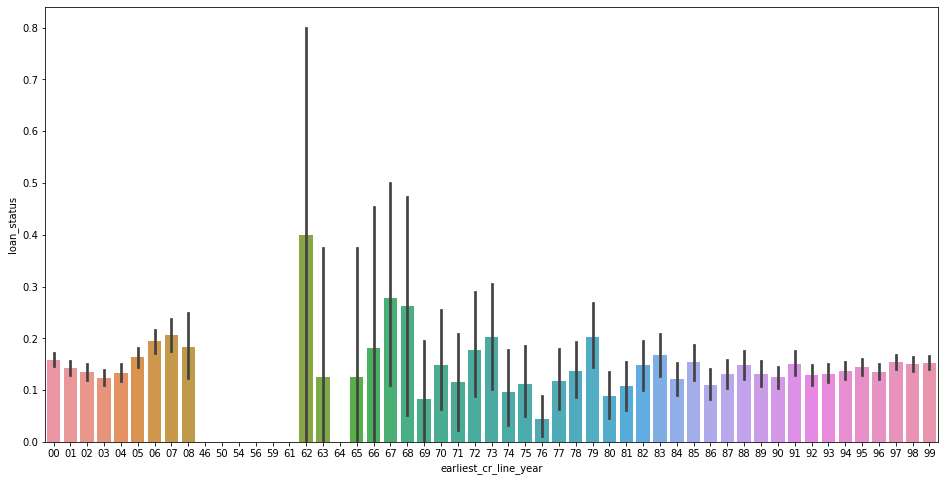

In [79]:
#plotting the default probablitiy against the earliest_cr_line_year
plt.figure(figsize=(16,8))
sns.barplot(data = clean_loan, x = 'earliest_cr_line_year',y = 'loan_status',
            order = sorted(clean_loan.earliest_cr_line_year.unique()))

From the above plot, it is clear that the default probability is high when the candidate earliest credit line is before the 1968. And the default probabalitiy is same across the other years. Hence we **can't treate this as the important driver variable** but we can present this observation.

<AxesSubplot:xlabel='grade', ylabel='loan_status'>

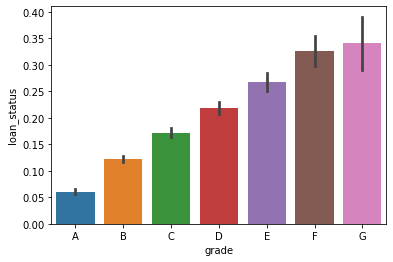

In [80]:
#plotting the default probablitiy against the grade
sns.barplot(x=clean_loan.grade,y=clean_loan.loan_status, order = sorted(clean_loan['grade'].unique()))

From the above plot, it is clear that the deafult probability is mostly increasing with the grade. And it is also confirmed with the impact table. So we **can consider this as the important driver variable.**

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='loan_status'>

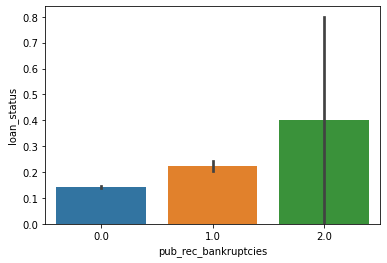

In [81]:
#plotting the default probablitiy against the pub_rec_bankruptcies
sns.barplot(data = clean_loan, x = 'pub_rec_bankruptcies',y = 'loan_status')

In [82]:
#Checking the value_counts of the pub_rec_bankruptcies
clean_loan.pub_rec_bankruptcies.value_counts()

0.0    36227
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

From the above plot, it is clear that the default probability is high when the candidate has the history of the bankruptcies. But we have very less datapoints when there is a bankruptcy. Hence we **can't treat this as the important driver variable but we can present this observation**

<AxesSubplot:xlabel='addr_state', ylabel='loan_status'>

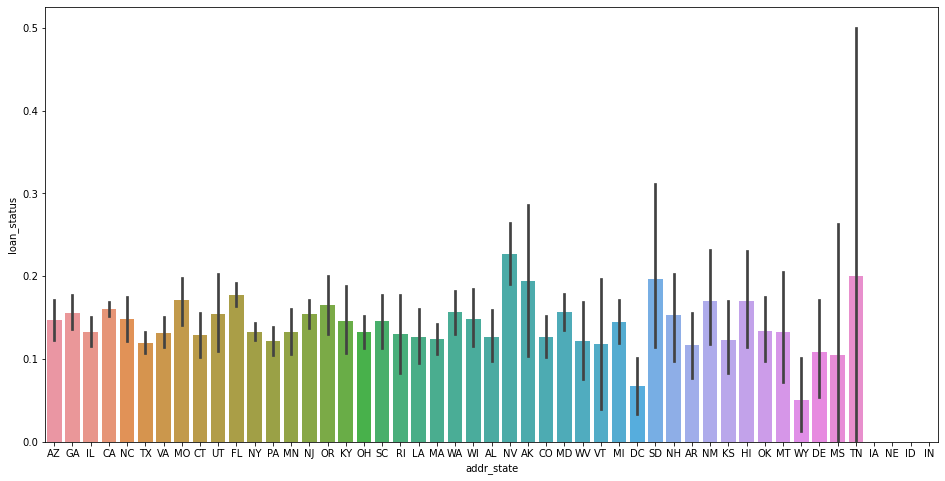

In [83]:
#plotting the default probablitiy against the addr_state
plt.figure(figsize=(16,8))
sns.barplot(data = clean_loan, x = 'addr_state', y = 'loan_status')

From the above plot, it is clear that the default probability is high in few states such as the NV, AK, SD and TN. And the default probabalitiy is same across the other states. Hence we **can't treate this as the important driver variable but we can present this observation.**

<AxesSubplot:xlabel='pub_rec', ylabel='loan_status'>

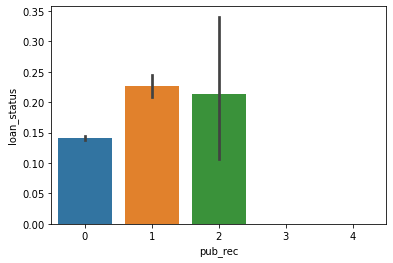

In [84]:
#plotting the default probablitiy against the pub_rec
sns.barplot(data = clean_loan, x = 'pub_rec',y = 'loan_status')

In [85]:
#Checking the pub_rec of the pub_rec_bankruptcies
clean_loan.pub_rec.value_counts()

0    35819
1     1994
2       47
3        7
4        2
Name: pub_rec, dtype: int64

From the above plot, it is clear that the default probability is high when the candidate has the history of the derogatory public records. But we have very less datapoints when there is a derogatory record. Hence we **can't treat this as the important driver variable but we can present this observation**

<AxesSubplot:xlabel='int_rate_bins', ylabel='loan_status'>

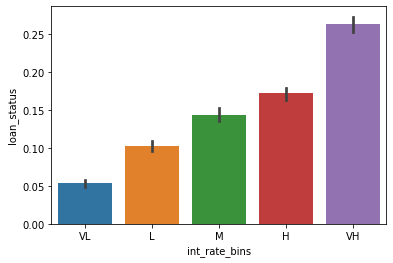

In [86]:
#plotting the default probablitiy against the int_rate_bins
sns.barplot(x=clean_loan.int_rate_bins,y=clean_loan.loan_status)

From the above plot, it is clear that the deafult probability is mostly increasing with the int_rate_bins. And it is also confirmed with the impact table. So we **can consider this as the important driver variable.**

<AxesSubplot:xlabel='inq_last_6mths', ylabel='loan_status'>

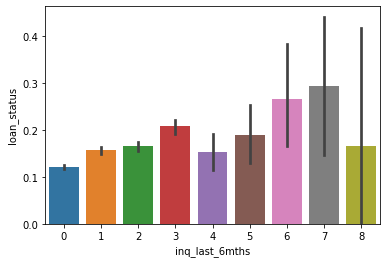

In [87]:
#plotting the default probablitiy against the inq_last_6mths
sns.barplot(data = clean_loan, x = 'inq_last_6mths',y = 'loan_status')

Even though the deafult probability is showing some pattern with the inq_last_6mths, it doesn't make sense to take this as the important driver variable from the domain point of view. Actually, loan probability doesn't depend on number of enquiries done. So we **can't treate this as the important driver variable.** 

<AxesSubplot:xlabel='loan_status', ylabel='purpose'>

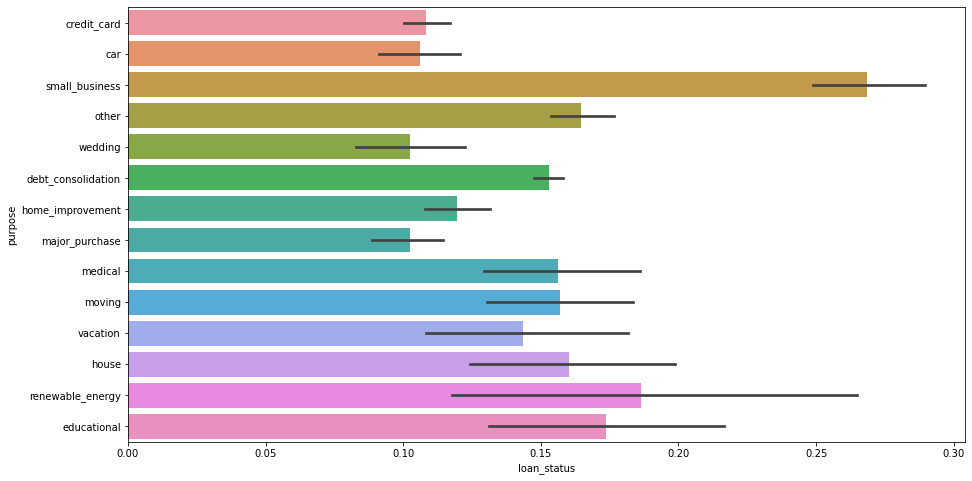

In [88]:
#plotting the default probablitiy against the purpose
plt.figure(figsize=(15,8))
sns.barplot(x=clean_loan.loan_status,y=clean_loan.purpose)

From the above plot, it is clear that the deafult probability is varying significantly with the purpose of the loan. And it is also confirmed with the impact table. So we **can consider this as the important driver variable. For the Bivariate analysis we have considered all the purpose and not top 4/5 purposes.**

<AxesSubplot:xlabel='year', ylabel='loan_status'>

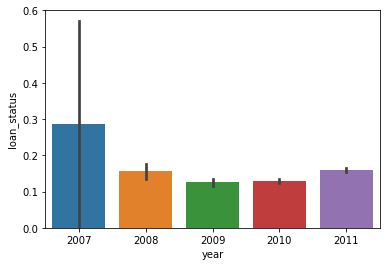

In [89]:
#plotting the default probablitiy against the year
sns.barplot(x=clean_loan.year,y=clean_loan.loan_status)

From the above plot, it is clear that the default probability is high in the year of 2007. And the default probabalitiy is not varying much in the other years. Hence we **can't treate this as the important driver variable but we can present this observation.**

<AxesSubplot:xlabel='term', ylabel='loan_status'>

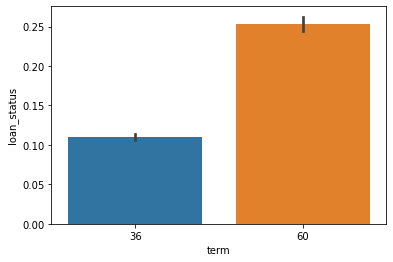

In [90]:
#plotting the default probablitiy against the term
sns.barplot(x=clean_loan.term,y=clean_loan.loan_status)

From the above plot, it is clear that the deafult probability is mostly increasing with the term. And it is also confirmed with the impact table. So we **can consider this as the important driver variable.**

<AxesSubplot:xlabel='annual_inc_bins', ylabel='loan_status'>

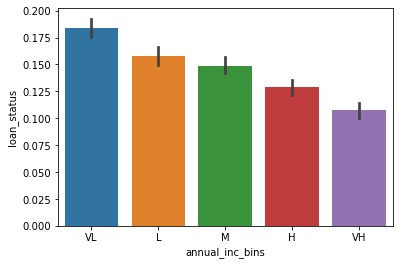

In [91]:
#plotting the default probablitiy against the annual_inc_bins
sns.barplot(x=clean_loan.annual_inc_bins,y=clean_loan.loan_status)

From the above plot, it is clear that the deafult probability is mostly decreasing with the annual income. And it is one of the important variable from the domain perspective. So we **can consider this as the important driver variable.**

<AxesSubplot:xlabel='funded_amnt_inv_bins', ylabel='loan_status'>

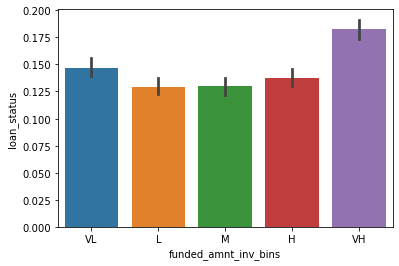

In [92]:
#plotting the default probablitiy against the funded_amnt_inv_bins
sns.barplot(x=clean_loan.funded_amnt_inv_bins,y=clean_loan.loan_status)

From the above plot, it is clear that the deafult probability is not changing with the funded amount. But it is one of the important variable from the domain perspective. So we **may consider this as the important driver variable.**

<AxesSubplot:xlabel='home_ownership', ylabel='loan_status'>

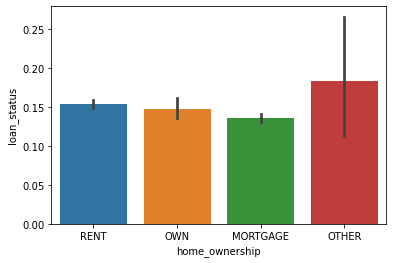

In [93]:
#plotting the default probablitiy against the home_ownership
sns.barplot(data = clean_loan, x = 'home_ownership',y = 'loan_status')

From the above plot, it is clear that the deafult probability is not changing with the home ownership status. But it is one of the important variable from the domain perspective. So we **may consider this as the important driver variable.**

<AxesSubplot:xlabel='dti_bins', ylabel='loan_status'>

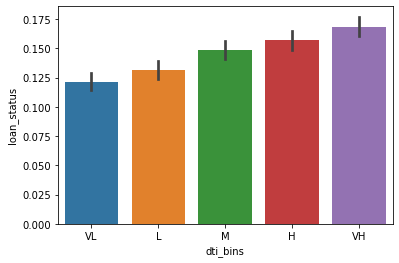

In [94]:
#plotting the default probablitiy against the dti_bins
sns.barplot(x=clean_loan.dti_bins,y=clean_loan.loan_status)

From the above plot, it is clear that the deafult probability is mostly increasing with the debt to income ratio. And it is one of the important variable from the domain perspective. So we **can consider this as the important driver variable.**

<AxesSubplot:xlabel='verification_status', ylabel='loan_status'>

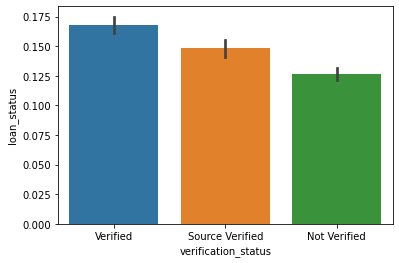

In [95]:
#plotting the default probablitiy against the verification_status
sns.barplot(x=clean_loan.verification_status,y=clean_loan.loan_status)

From the above plot it is clear that the default probability is not changing with the verification_status. And it is also confirmed with the impact table. Hence we **can't consider this as the important driver variable.**

<AxesSubplot:xlabel='month', ylabel='loan_status'>

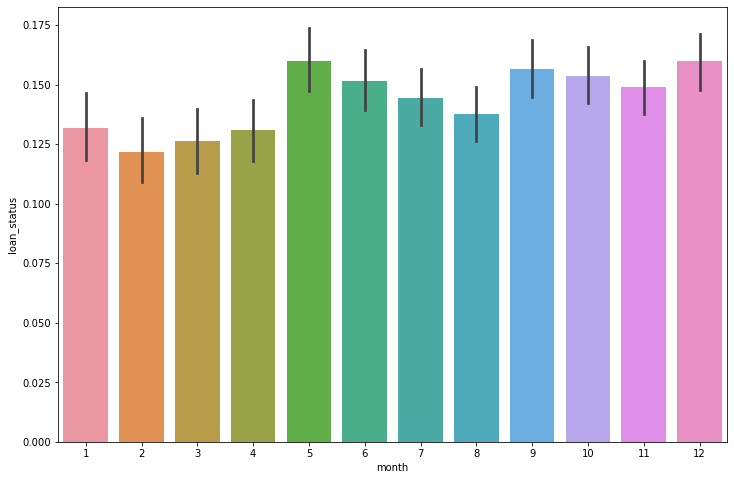

In [96]:
#plotting the default probablitiy against the month
plt.figure(figsize=(12,8))
sns.barplot(x=clean_loan.month,y=clean_loan.loan_status)

From the above plot it is clear that the default probability is not changing with the month. And it is also confirmed with the impact table. Hence we **can't consider this as the important driver variable.**

<AxesSubplot:xlabel='emp_length', ylabel='loan_status'>

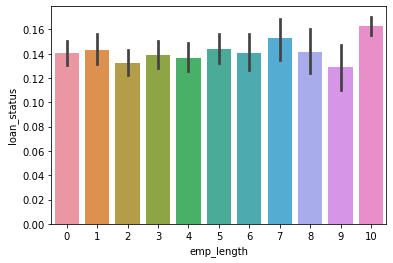

In [97]:
#plotting the default probablitiy against the emp_length
sns.barplot(x=clean_loan.emp_length,y=clean_loan.loan_status)

From the above plot it is clear that the default probability is not changing with the emp_length. And it is also confirmed with the impact table. Hence we **can't consider this as the important driver variable.**

<AxesSubplot:xlabel='installment_bins', ylabel='loan_status'>

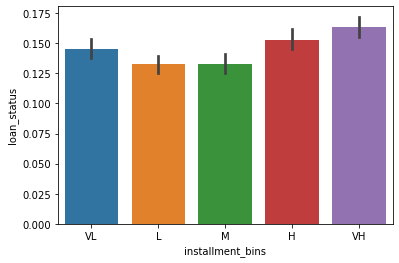

In [98]:
#plotting the default probablitiy against the installment_bins
sns.barplot(x=clean_loan.installment_bins,y=clean_loan.loan_status)

From the above plot it is clear that the default probability is not showing much correlation with the installment_bins. And it is also confirmed with the impact table. Even though it is the important variable from the domain perspective, as we already considering the 'debt to income ratio' and the 'funded amount' as the important driver variables, we **can safely skip this variable.**

<AxesSubplot:xlabel='total_acc_bins', ylabel='loan_status'>

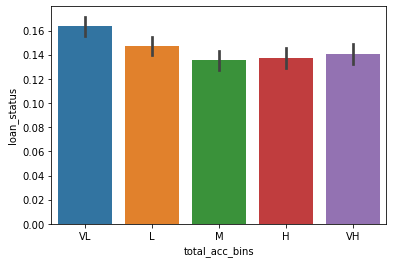

In [99]:
#plotting the default probablitiy against the total_acc_bins
sns.barplot(x=clean_loan.total_acc_bins,y=clean_loan.loan_status)

From the above plot it is clear that the default probability is not changing with the number of the credit accounts. And it is also confirmed with the impact table. Hence we **can't consider this as the important driver variable.**

<AxesSubplot:xlabel='open_acc_bins', ylabel='loan_status'>

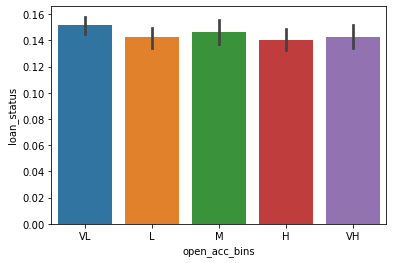

In [100]:
#plotting the default probablitiy against the open_acc_bins
sns.barplot(x=clean_loan.open_acc_bins,y=clean_loan.loan_status)

From the above plot it is clear that the default probability is not changing with the number of the currently opened credit accounts. And it is also confirmed with the impact table. Hence we **can't consider this as the important driver variable.**

### Observations from the univariate analysis:

- From the impact analysis and the further plots, we have identified the below the columns as the important driver variable for the loan status.
    - sub_grade, grade, int_rate_bins, purpose, term, annual_inc_bins, dti_bins
    - As sub_grade, grade and int_rate_bins are highly correlated. We can select anyone of the column and skip the remaining two. We have selected the int_rate_bins as the important driver varaible among this three.
    
    
**So, the imporatant driver variables are**
1. int_rate_bins : Default probability is monotonically increasing with the interest rate (Also with the Grade and Sub_Grade)
2. purpose : High Default probability is more when the loan purpose is "Small_Business" - 0.26
3. term : Default probability is 0.11 when the loan_term is 36 months and 0.25 when the loan_term is 60 months
4. annual_inc_bins : Default probability is inversely proportional to the annual income.
5. dti_bins : Default probability is increasing with the increase in the debt-to-income ratio.

**Additionally, the below two columns are also showing some patterns with the loan_status and they're important from the domain point of view**
1. funded_amnt_inv_bins :  Default probability is directly proportional to the loan amount
2. home_ownership : Default probability is more when the home_ownership is "other"

We will dig deep about these seven columns in the Bi-varaiate analysis.
    
    
**Some of the remaining columns are showing more default probability in some of the values and those observations are as below.**
1. The default probability is high when the candidate earliest credit line is before 1968. 
2. The default probability is high when the candidate has the history of the bankruptcies.
3. The default probability is high in few states such as the NV, AK, SD and TN.
4. The default probability is high when the candidate has the history of the derogatory public records
5. The default probability is high in the year of 2007. And it might be the year that the lenden started their business. And going further they imporved their business so that the default % is not that much in the other years.
6. The default probability is high when the candidate earliest credit line is before the 1968.

### 4. Bivariate analysis

From the univariate analysis, we have seen that the default probability is changing heavily with the purpose. In the bivariate anlysis, we can see the patterns of the default probability against the purpose and the remaining important derived variables one-by-one.

<AxesSubplot:xlabel='term'>

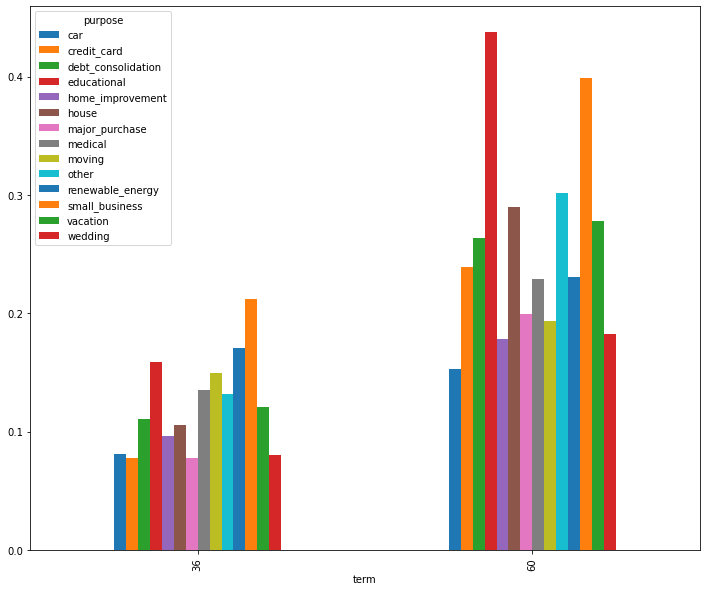

In [101]:
# Plotting the loan_status against the term and the purpose
var1=pd.pivot_table(data=clean_loan, columns='purpose', index='term',values='loan_status',aggfunc=np.mean)
var1.plot(kind='bar',stacked=False,figsize=[12,10])

From the above plot, it is clear that the default probability for the small_business purpose is high when the term is 36 months. And default probability is high for the debt_consolidation, educational, house, other, small business and the vacation purposes when the loan_term is 60 months.

<AxesSubplot:xlabel='term'>

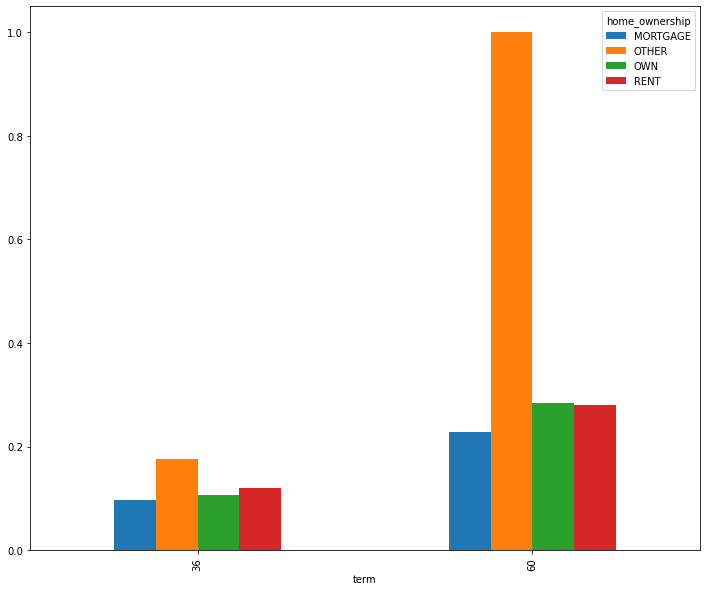

In [102]:
# Plotting the loan_status against the term and the home_ownership
var3=pd.pivot_table(data=clean_loan, columns='home_ownership', index='term',values='loan_status',aggfunc=np.mean)
var3.plot(kind='bar',stacked=False,figsize=[12,10])

From the above plot, it is crystal clear that the default probability is 1 when the home_ownership status is other and the term is 60 months. Even when the term is 36 months, the default probability in the high when the home_ownership status is other. But there is only one entry in this configuration (term = 60 months and home_ownership = other), and very less entries in the other home_ownership. So it is better to avoid the loans when the home_ownership is others.

In [103]:
#create a df with slected columns
loan1 = clean_loan[['annual_inc','funded_amnt_inv','int_rate','loan_status','dti','emp_length','term']]
corr = loan1.corr()
corr.style.background_gradient(cmap='coolwarm')

,annual_inc,funded_amnt_inv,int_rate,loan_status,dti,emp_length,term
annual_inc,1.000000,0.260097,0.050105,-0.042278,-0.121270,0.094810,0.045012
funded_amnt_inv,0.260097,1.000000,0.294831,0.040634,0.064727,0.138106,0.337273
int_rate,0.050105,0.294831,1.000000,0.212551,0.105897,-0.013823,0.439614
loan_status,-0.042278,0.040634,0.212551,1.000000,0.044865,0.023017,0.176362
dti,-0.121270,0.064727,0.105897,0.044865,1.000000,0.044097,0.073340
emp_length,0.094810,0.138106,-0.013823,0.023017,0.044097,1.000000,0.095806
term,0.045012,0.337273,0.439614,0.176362,0.073340,0.095806,1.000000


From the above plot, it is clear that the loan amount is positively correlated with the annual income and the interest rate. And loan amount, interest rate are positively correlated with the term.

<AxesSubplot:xlabel='int_rate_bins', ylabel='purpose'>

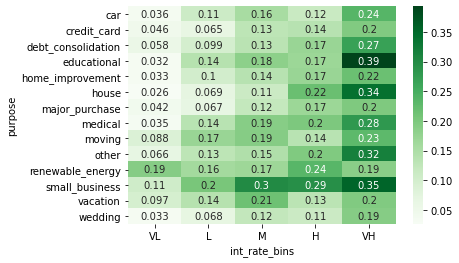

In [104]:
# Plotting the loan_status against the term and the int_rate_bins
heat1 = pd.pivot_table(data=clean_loan, index='purpose', columns='int_rate_bins', values='loan_status')
sns.heatmap(heat1, cmap="Greens", annot=True)

From the above plot, it is clear that mostly all the purposes are showing high default probability when the interest rate is too high. In general Educational loan, house, other and the small_business with very high interest rate, small business with medium and high interest rate and renewal energy and house with high interest rate are showing more default probability.

<AxesSubplot:xlabel='annual_inc_bins', ylabel='purpose'>

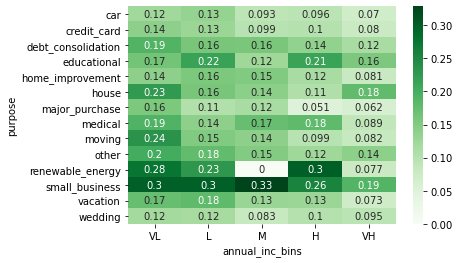

In [105]:
# Plotting the loan_status against the term and the annual_inc_bins
heat2 = pd.pivot_table(data=clean_loan, index='purpose', columns='annual_inc_bins', values='loan_status')
sns.heatmap(heat2, cmap="Greens", annot=True)

The high income group for all purpose is relatively safe to lend money.
The small_business is showing high default probabilty in all income group except very high income group.
Loan with purpose renewal_energy is showing high chance of default with very low, low and high income bracket.

<AxesSubplot:xlabel='dti_bins', ylabel='purpose'>

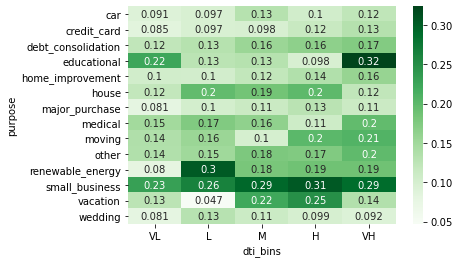

In [106]:
# Plotting the loan_status against the term and the dti_bins
heat2 = pd.pivot_table(data=clean_loan, index='purpose', columns='dti_bins', values='loan_status')
sns.heatmap(heat2, cmap="Greens", annot=True)

Small-buiness loan is showing high default in all debt to income ration category.
The high probability of default is for education loan with very high debt to income ratio.

<AxesSubplot:xlabel='funded_amnt_inv_bins', ylabel='purpose'>

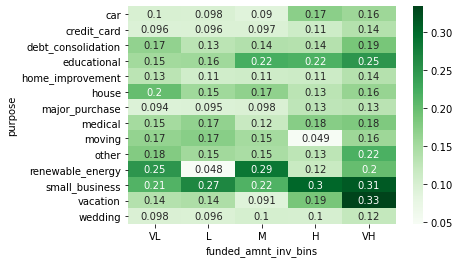

In [107]:
# Plotting the loan_status against the term and the funded_amnt_inv_bins
heat3 = pd.pivot_table(data=clean_loan, index='purpose', columns='funded_amnt_inv_bins', values='loan_status')
sns.heatmap(heat3, cmap="Greens", annot=True)